In [6]:
%matplotlib inline
# disable autoreload for global dataset
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from learn import *

In [8]:
num_gpus = 2
gpu_start = 8
num_workers = 3 * num_gpus
device_ids = range(gpu_start, gpu_start + num_gpus)
torch.cuda.set_device(gpu_start)

bs = 15

## Plot predictions

In [10]:
model_name = 'deeplab'

In [11]:
learn, denorm, data = learner_on_dataset(datapaths[1], bs, device_ids, num_workers, model_name=model_name,
                                         debug=False, global_dataset=False)
(trn_x,trn_y), (val_x,val_y) = data

HBox(children=(IntProgress(value=0, description='ims', max=2695), HTML(value='')))

HBox(children=(IntProgress(value=0, description='ims', max=1156), HTML(value='')))


Data finished loading: data/train/AOI_2_Vegas_Train


In [2]:
#resume
learn, denorm, data = learner_on_dataset(datapaths[1], bs, device_ids, num_workers, model_name='deeplab',
                                         debug=False, global_dataset=False, data=data)
(trn_x,trn_y), (val_x,val_y) = data

NameError: name 'learner_on_dataset' is not defined

In [12]:
learn.load('vegas-deeplab2')

RuntimeError: While copying the parameter named module.Scale.layer5.conv2d_list.0.weight, whose dimensions in the model are torch.Size([1, 2048, 3, 3]) and whose dimensions in the checkpoint are torch.Size([2, 2048, 3, 3]).

### Get test set

In [20]:
n_ims = 10
x, y = learn.data.trn_dl.get_batch(range(5000, 5000 + n_ims))

In [ ]:
preds = learn.predict_array(x).squeeze()

In [ ]:
x.shape, y.shape, preds.shape

In [ ]:
_preds = preds[:,0]

In [41]:
ious = sep_iou(_preds.squeeze(), y, 0.5)
ious.shape

(10,)

Find threshhold

In [47]:
threshs = np.linspace(0.8, 1, 50)
mean_iou = [jaccard_coef_parallel(_preds.squeeze(), y, th) for th in threshs]

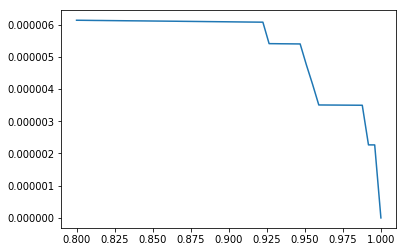

In [48]:
plt.plot(threshs, mean_iou)

In [58]:
_preds.shape, pred2.shape

((10, 256, 256), (256, 256))

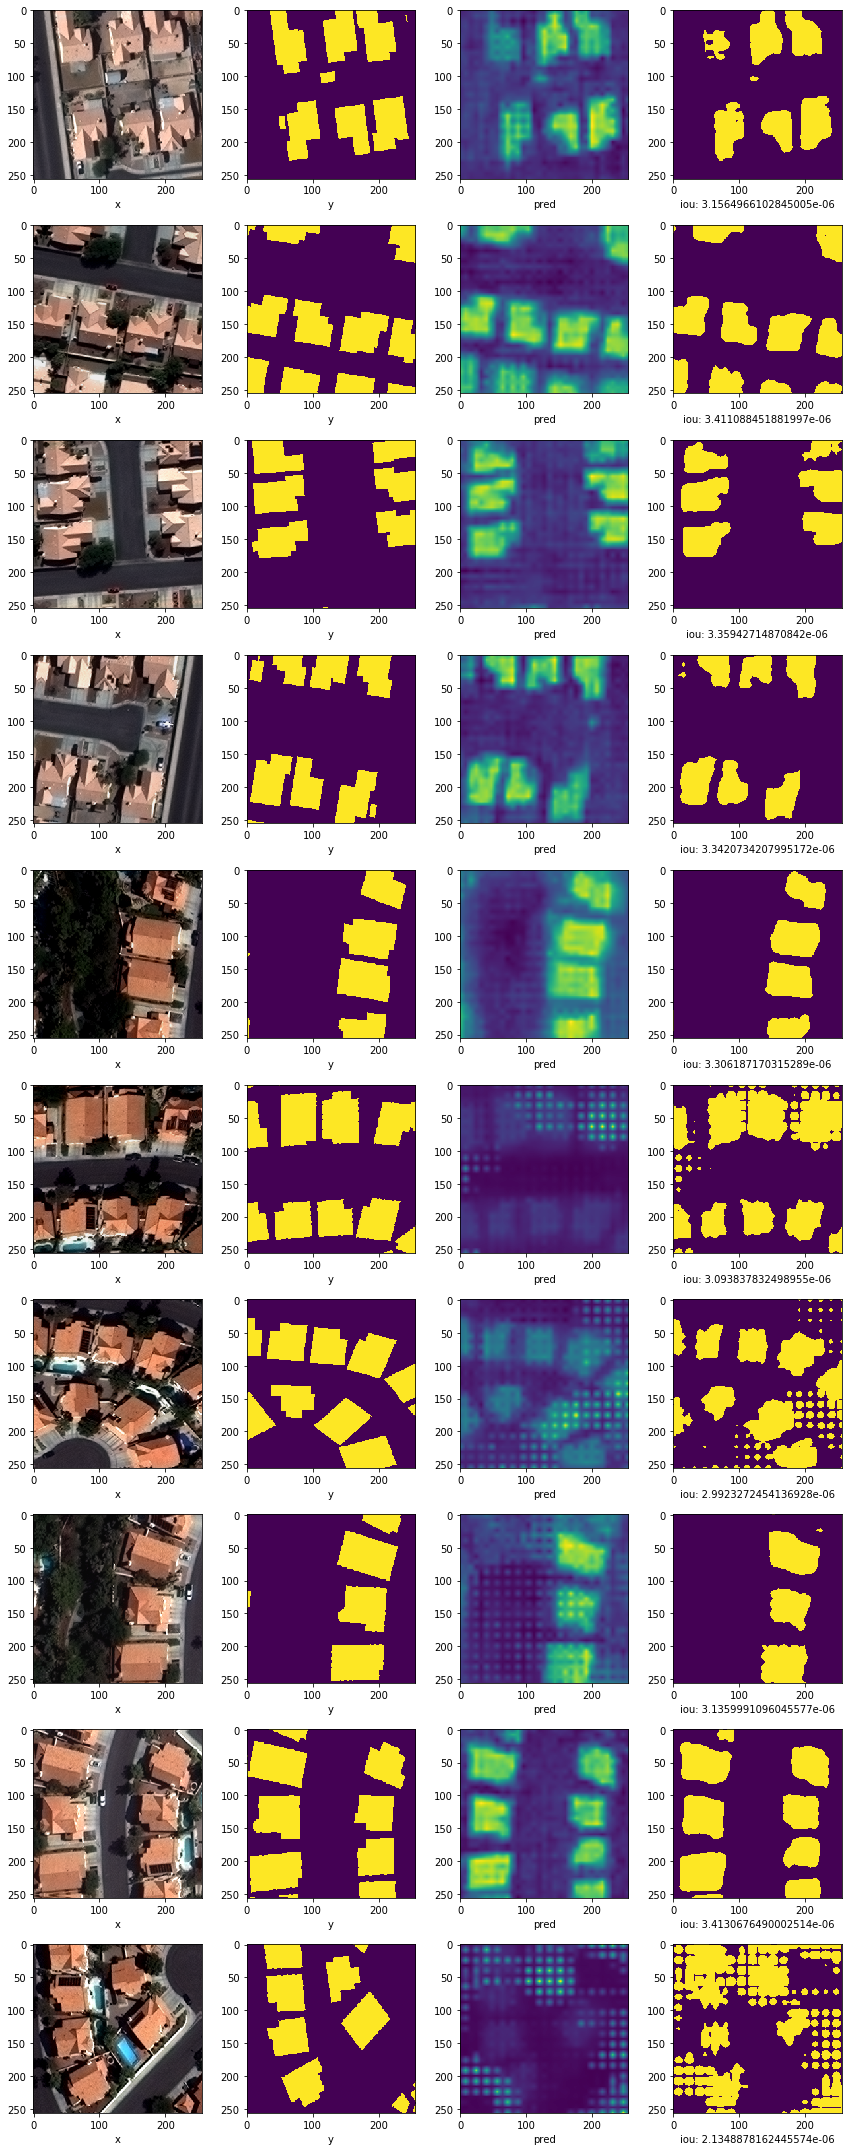

In [62]:
cols = 4
fig, ax = plt.subplots(n_ims, cols, figsize=(3 * cols, 3 * n_ims))
fig.tight_layout()
ious = sep_iou(preds.squeeze(), y)
for i in range(n_ims):
    ax[i][0].imshow(denorm(x[i]).squeeze())
    ax[i][0].set_xlabel('x')
    ax[i][1].imshow(y[i].squeeze())
    ax[i][1].set_xlabel('y')
    ax[i][2].imshow(_preds[i].squeeze())
    ax[i][2].set_xlabel('pred')
    iou = ious[i]
    
    pred2 = bool_pred(_preds[i].squeeze(), 0.5)
#     pred2[_preds[i] > 5] = 0
    ax[i][3].imshow(pred2)
    ax[i][3].set_xlabel('iou: ' + str(ious[i]))

In [4]:
learn, denorm, data = learner_on_dataset(datapaths[1], bs, device_ids, num_workers, 
                                         model_name='deeplab', debug=True)
(trn_x,trn_y), (val_x,val_y) = data

HBox(children=(IntProgress(value=0, description='ims', max=2695), HTML(value='')))

HBox(children=(IntProgress(value=0, description='ims', max=1156), HTML(value='')))


Data finished loading: data/train/AOI_2_Vegas_Train


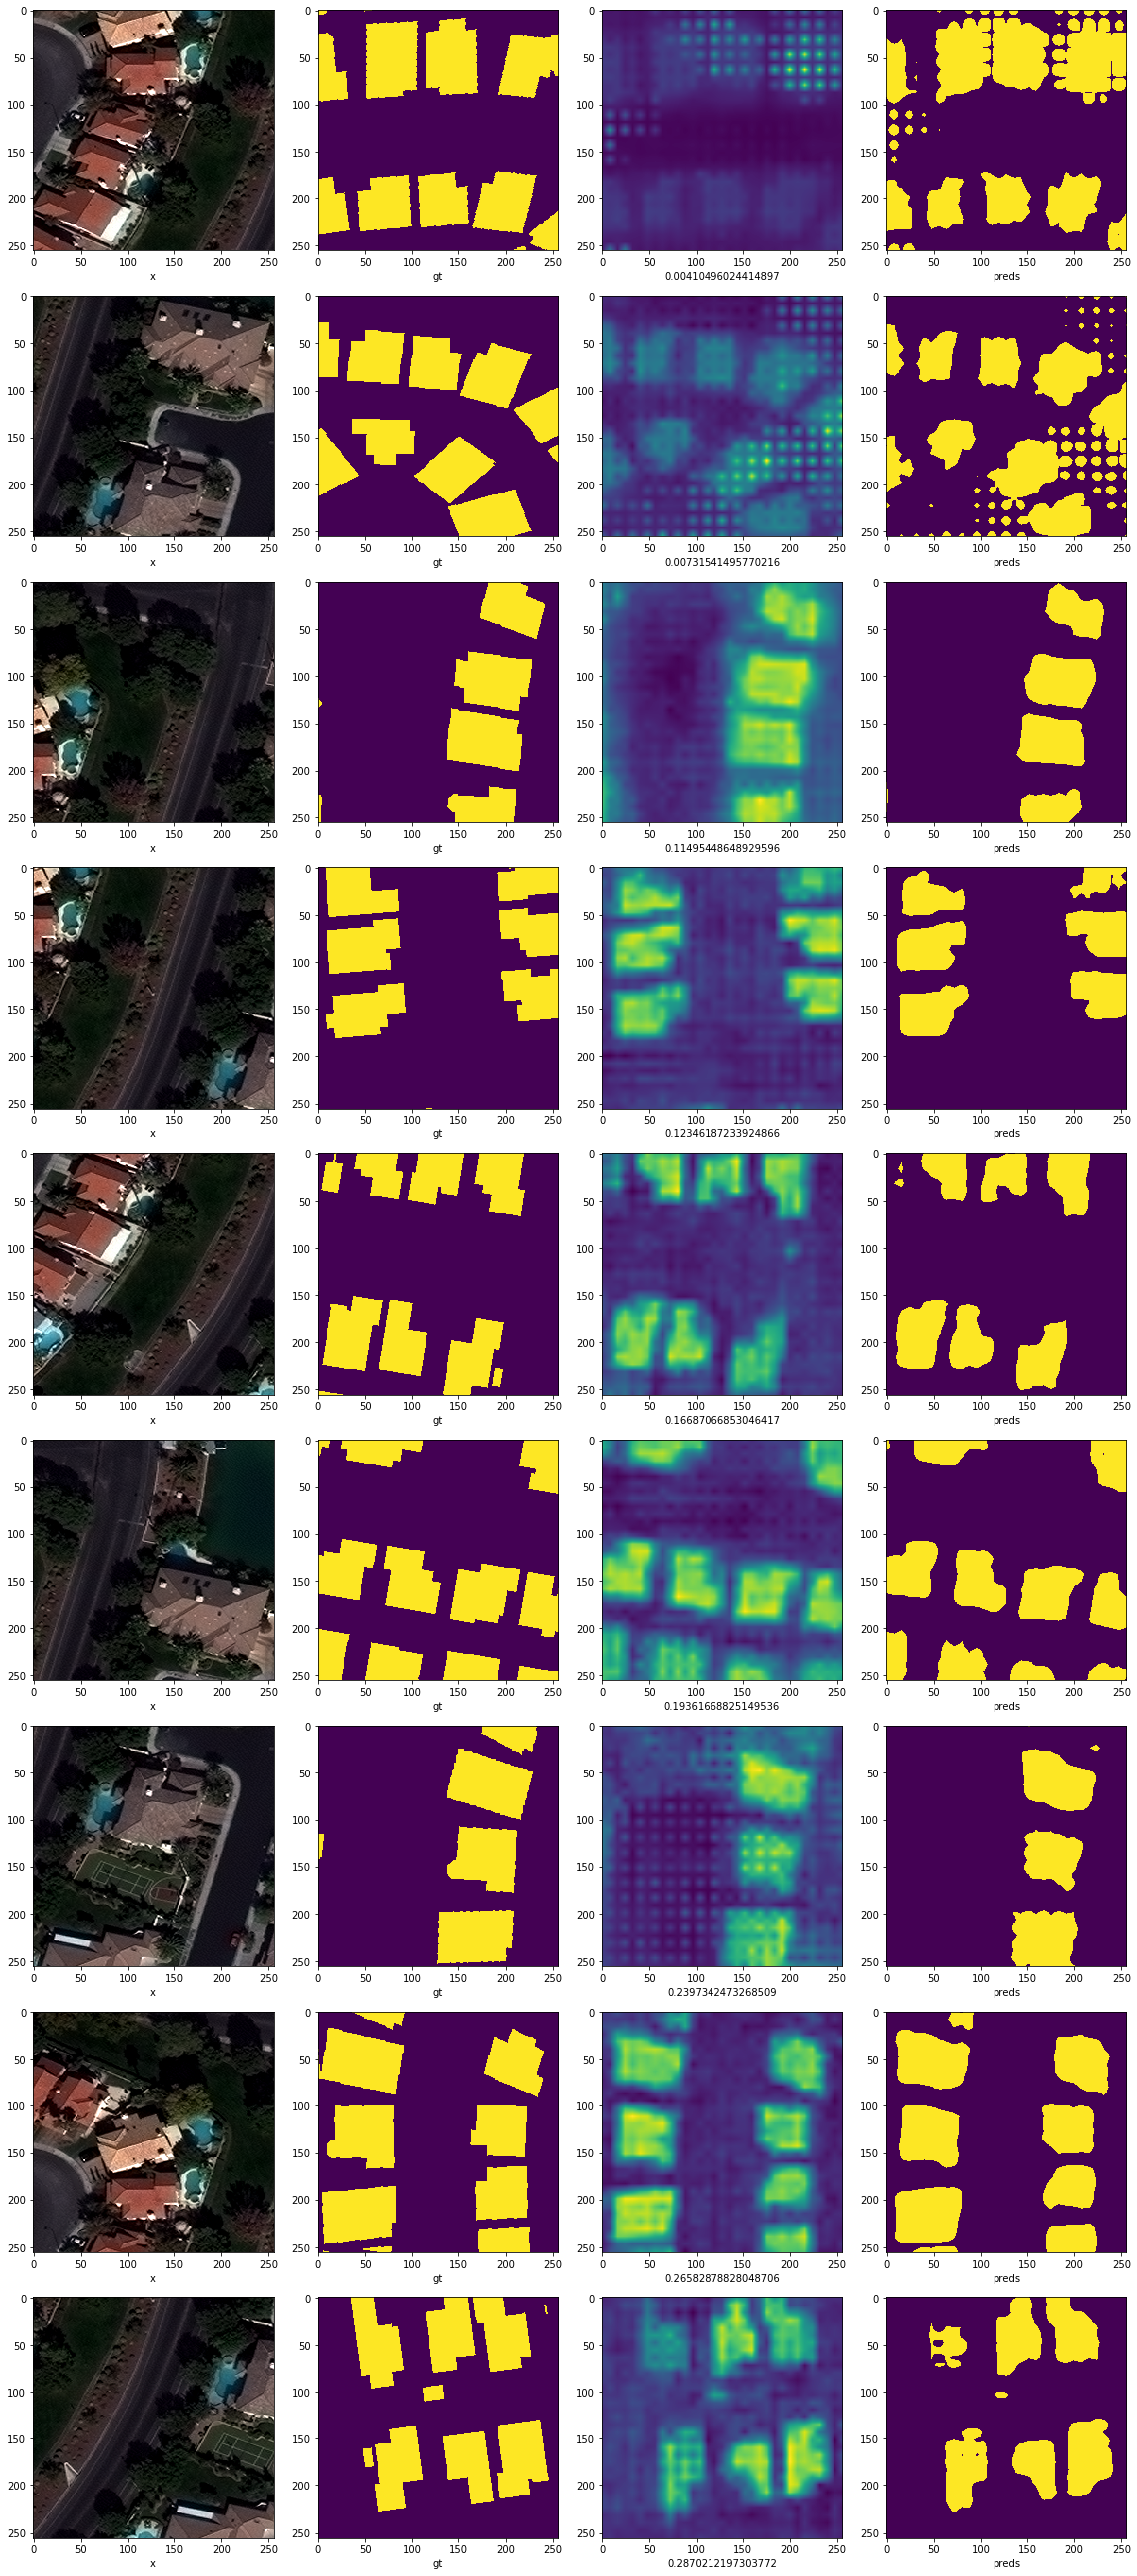

In [126]:
plot_worse_preds(T(_preds), T(y), learn, crit=F.binary_cross_entropy_with_logits, thresh=0.5)

In [ ]:
learn.TTA()

In [89]:
y.shape

(10, 256, 256)

In [100]:
score_parallel(jaccard_coef, y, _preds, thresh=0)

array([0.     , 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.     , 0.     , 0.     ])

In [88]:
np.empty(10)

array([0.     , 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.     , 0.     , 0.     ])